In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer

In [3]:
data_obj = load_boston()
df = pd.DataFrame(data=data_obj.data, columns=data_obj.feature_names)

/Users/lev_grafon/github_repos/feature_engineering_course/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative da

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Task 1: Logarithm transformation

In [6]:
def diagnostic_plots(df, variable): 
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt) 
    plt.show()

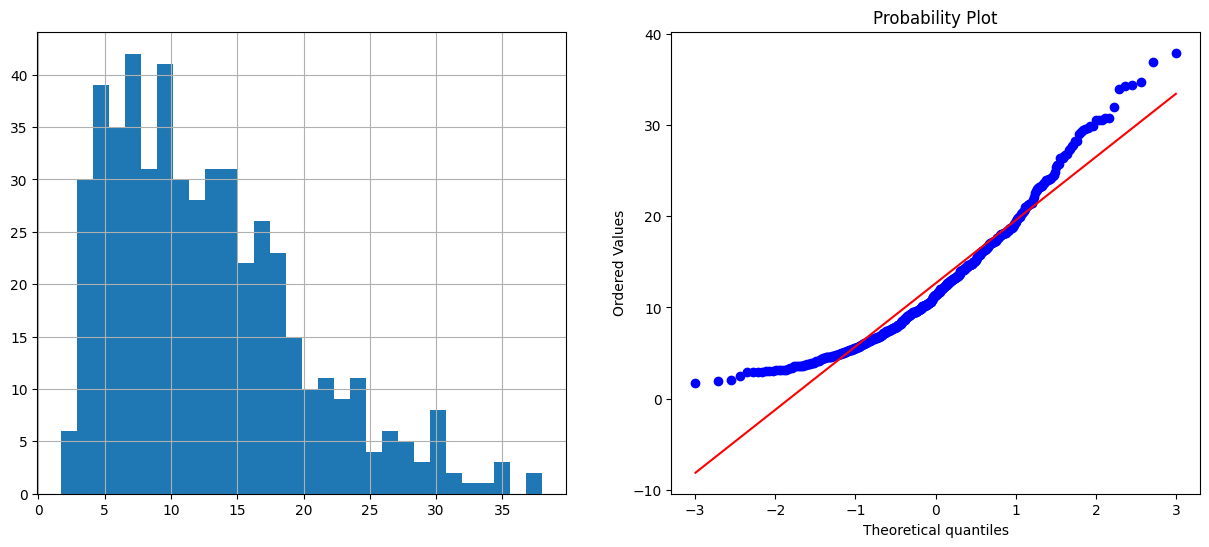

In [7]:
diagnostic_plots(df, 'LSTAT')

In [9]:
df_log = df.copy()

In [16]:
df_log['LOG_LSTAT'] = FunctionTransformer(func=np.log).fit_transform(df_log['LSTAT'])

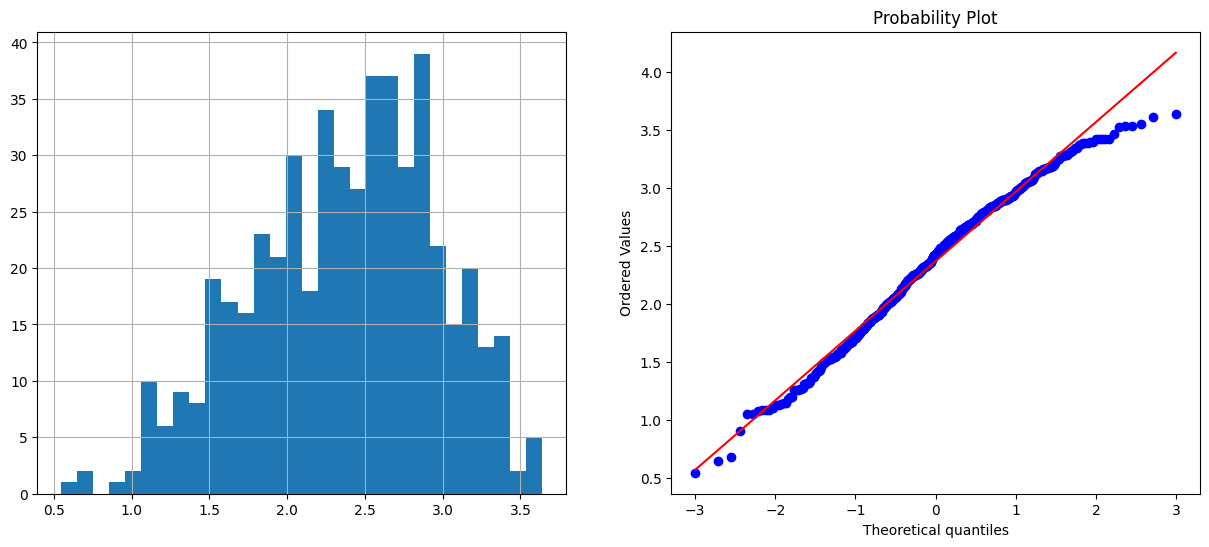

In [17]:
diagnostic_plots(df_log, 'LOG_LSTAT')

Task 2: Reciposal function 

In [18]:
df_inverse = df.copy()
df_inverse['INV_DIS'] = FunctionTransformer(func=lambda x: 1 / x).fit_transform(df_inverse['DIS'])

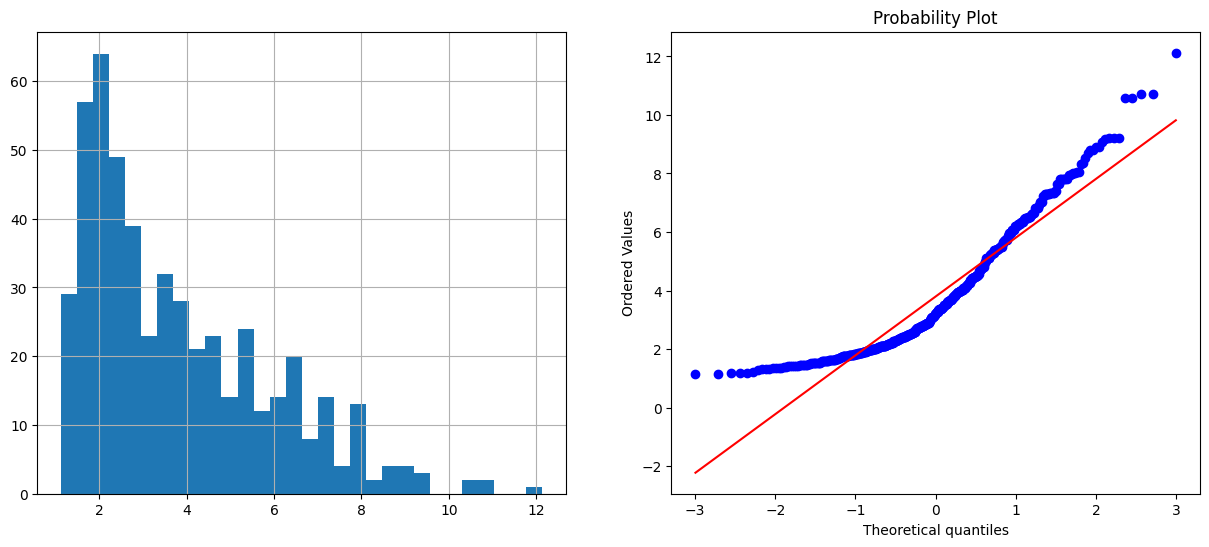

In [19]:
diagnostic_plots(df_inverse, 'DIS')

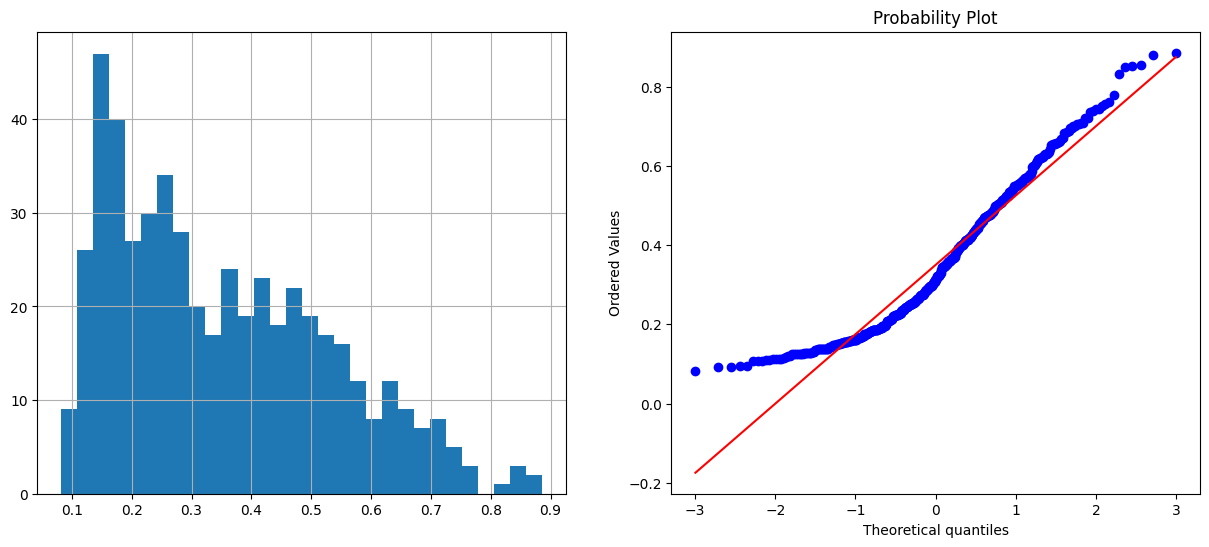

In [20]:
diagnostic_plots(df_inverse, 'INV_DIS')

Task 3: Square and cube root

In [21]:
df_root = df.copy()
root_tf = FunctionTransformer(func=np.sqrt)
cube_tf = FunctionTransformer(func=np.cbrt)

In [22]:
df_root['root_tf'] = root_tf.fit_transform(df_root['LSTAT'])
df_root['cube_tf'] = cube_tf.fit_transform(df_root['LSTAT'])

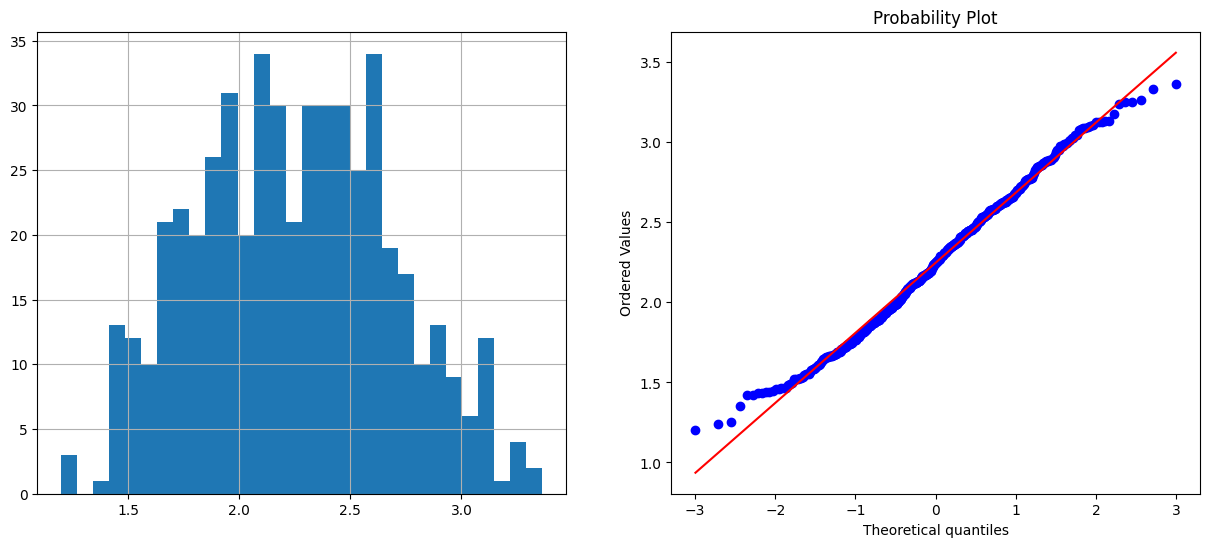

In [25]:
diagnostic_plots(df_root, 'cube_tf')

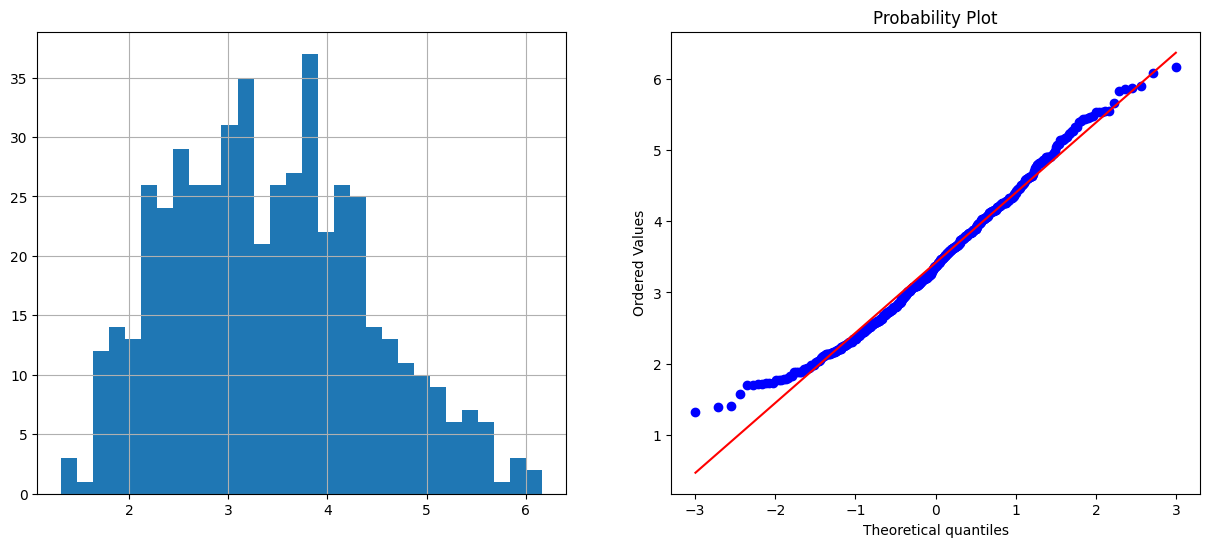

In [23]:
diagnostic_plots(df_root, 'root_tf')

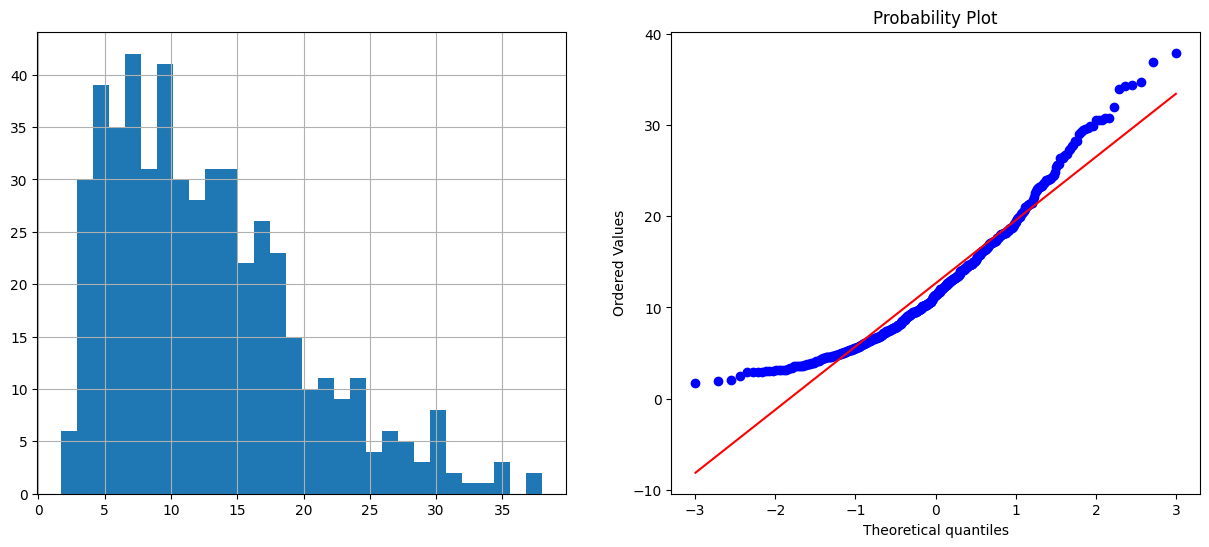

In [24]:
diagnostic_plots(df_root, 'LSTAT')

Task 4: Box-Cox transformation

In [26]:
df_bc = df.copy()

In [30]:
vals, param = FunctionTransformer(func=stats.boxcox).fit_transform(df_bc['LSTAT'])

In [31]:
param

0.22776736893884023

In [33]:
df_bc['BC_LSTAT'] = vals

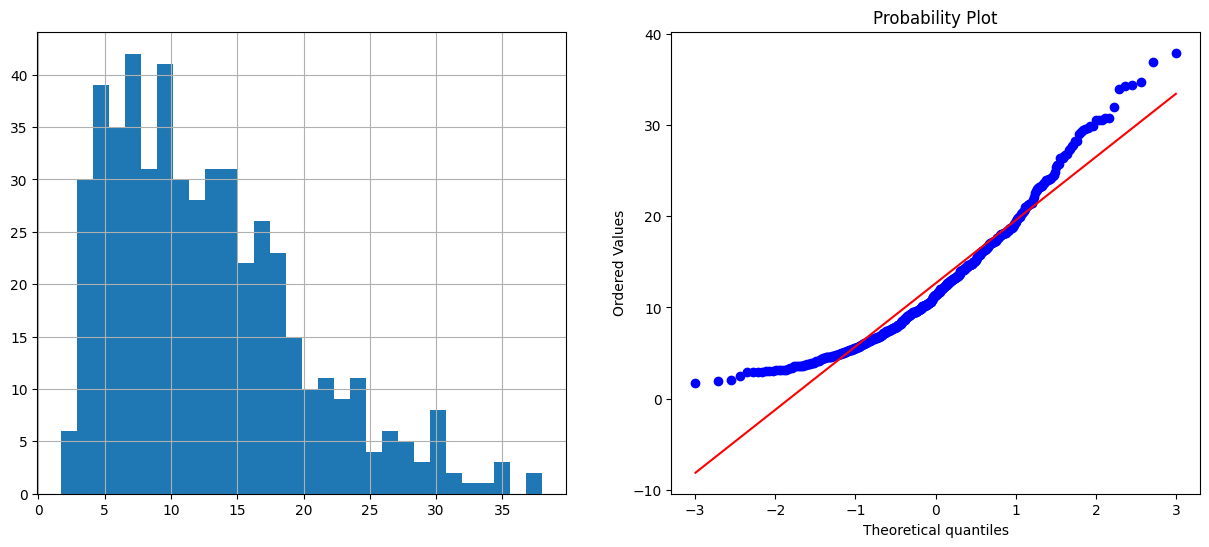

In [34]:
diagnostic_plots(df_bc, 'LSTAT')

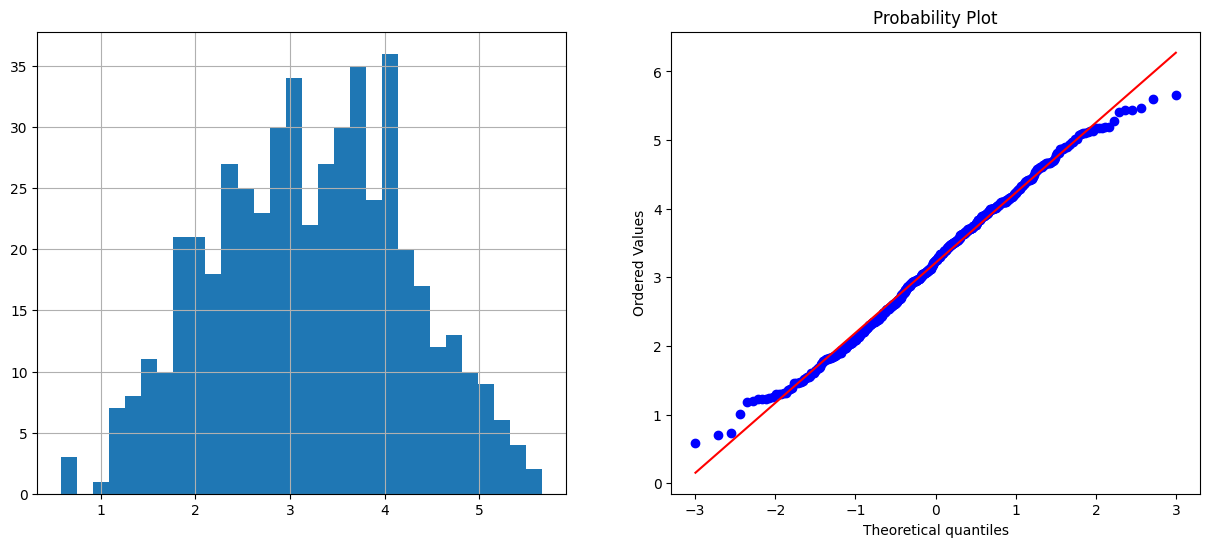

In [35]:
diagnostic_plots(df_bc, 'BC_LSTAT')